In [1]:
import requests
from bs4 import BeautifulSoup
import os
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [2]:
df_year = pd.read_csv("df_year.csv")
df_vader = pd.read_csv('ml_model.csv')

C:\Users\fleig\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (0,1,2,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
# Sentiment using word lists

In [11]:
df_year.head()

,Name,Type,Party,Republican,year,Speech_Parsed_2,Speech_words,mean_word_length,word_count,some_word_count,...,sentences,mean_sentence_length,positive_words,negative_words,positive_words_ratio,negative_words_ratio,we_count,war_count,i_count,sentiment
0,Donald Trump,State of the Union,Republican,1,2019,"madam speaker, mr. vice president, membe...","['', '', '', '', '', '', '', '', '', '', '', '...",6.014070,30022,22380,...,"[' madam speaker, mr. vice president, mem...",105.425087,244,177,0.010903,0.007909,114,6,41,67
1,Donald Trump,State of the Union,Republican,1,2018,"mr. speaker, mr. vice president, members ...","['', '', '', '', '', '', '', '', '', '', '', '...",6.012152,29559,21810,...,"[' mr. speaker, mr. vice president, member...",100.205342,243,147,0.011142,0.006740,118,2,28,96
2,Donald Trump,Inaugural Address,Republican,1,2017,"chief justice roberts, president carter, ...","['', '', '', '', '', 'chief', 'justice', 'robe...",6.002695,8187,5760,...,"[' chief justice roberts, president carter...",99.627737,88,30,0.015278,0.005208,49,0,3,58
3,Barack Obama,State of the Union,Democrat,0,2016,"mr. speaker, mr. vice president, members ...","['', '', '', '', '', '', '', '', '', '', '', '...",5.878791,34413,24576,...,"[' mr. speaker, mr. vice president, member...",92.084973,286,155,0.011637,0.006307,151,7,69,131
4,Barack Obama,State of the Union,Democrat,0,2015,"mr. speaker, mr. vice president, members ...","['', '', '', '', '', '', '', '', '', '', '', '...",5.816919,39266,28643,...,"[' mr. speaker, mr. vice president, member...",90.267302,305,171,0.010648,0.005970,187,4,79,134


In [10]:
df_year["sentiment"] = df_year["positive_words"] - df_year["negative_words"]

[Text(0, 0, '-50'),
 Text(0, 0, '0'),
 Text(0, 0, '50'),
 Text(0, 0, '100'),
 Text(0, 0, '150'),
 Text(0, 0, '200'),
 Text(0, 0, '250'),
 Text(0, 0, '300'),
 Text(0, 0, '350')]

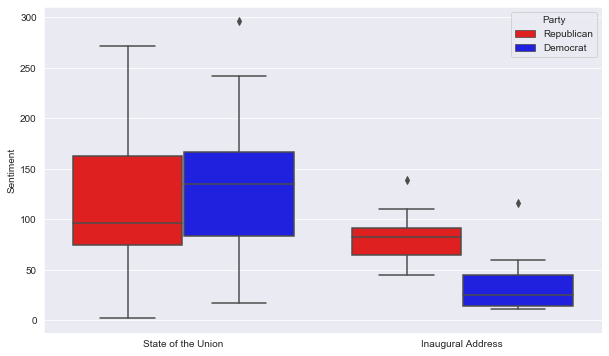

In [29]:
#Boxplot
sns.set_style("darkgrid")
ax = sns.boxplot(x='Type', y="sentiment", orient='v', hue='Party', data=df_year, palette = ['red', 'blue'])
#plt.title("Box plot of Sentiment")
plt.xlabel("")
plt.ylabel("Sentiment")

ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])

[Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0')]

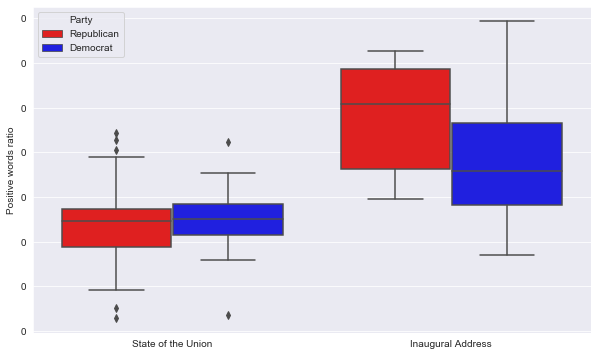

In [27]:
#Boxplot
sns.set_style("darkgrid")
ax = sns.boxplot(x='Type', y="positive_words_ratio", orient='v', hue='Party', data=df_year, palette = ['red', 'blue'])
# plt.title("Box plot of Positive words ratio")
plt.xlabel("")
plt.ylabel("Positive words ratio")

ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])

[Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0')]

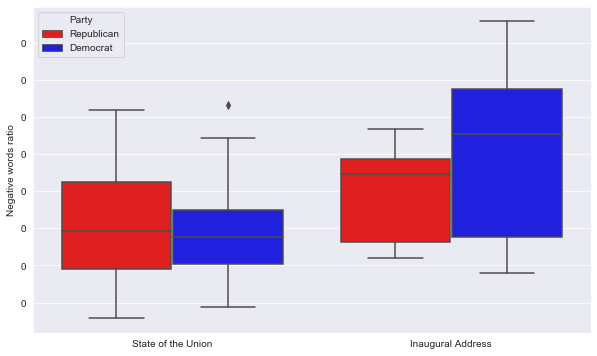

In [26]:
#Boxplot
sns.set_style("darkgrid")
ax = sns.boxplot(x='Type', y="negative_words_ratio", orient='v', hue='Party', data=df_year, palette = ['red', 'blue'])
# plt.title("Box plot of negative words ratio")
plt.xlabel("")
plt.ylabel("Negative words ratio")

ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])

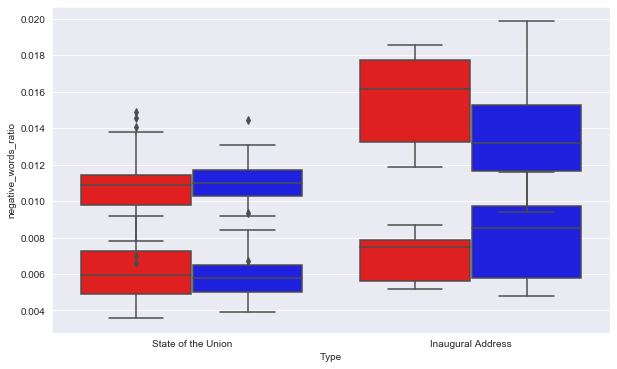

In [25]:
import matplotlib.pyplot as plt
import numpy as np

from pylab import rcParams

rcParams['figure.figsize'] = 10, 6

#fig, (ax1, ax2) = plt.subplots(1, 2)

sns.set_style("darkgrid")
ax1.set(xlabel='years', ylabel='Mean sentence length')
ax1 = sns.boxplot(x='Type', y="positive_words_ratio", orient='v', hue='Party', data=df_year, palette = ['red', 'blue'])
ax2.set(xlabel='years', ylabel='Mean sentence length')
ax2 = sns.boxplot(x='Type', y="negative_words_ratio", orient='v', hue='Party', data=df_year, palette = ['red', 'blue'])
ax2.get_legend().set_visible(False)
#plt.title("Box plot of negative words ratio")
#plt.xlabel("")
#plt.ylabel("Negative words ratio")



In [ ]:
# Snetiment using vader

[Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '1')]

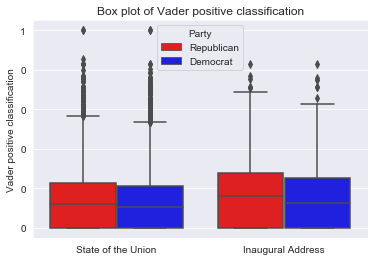

In [5]:
#Boxplot
sns.set_style("darkgrid")
ax = sns.boxplot(x='Type', y="vader_pos", orient='v', hue='Party', data=df_vader, palette = ['red', 'blue'])
plt.title("Box plot of Vader positive classification")
plt.xlabel("")
plt.ylabel("Vader positive classification")

ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])

[Text(0, 0, '-1'),
 Text(0, 0, '-1'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '1')]

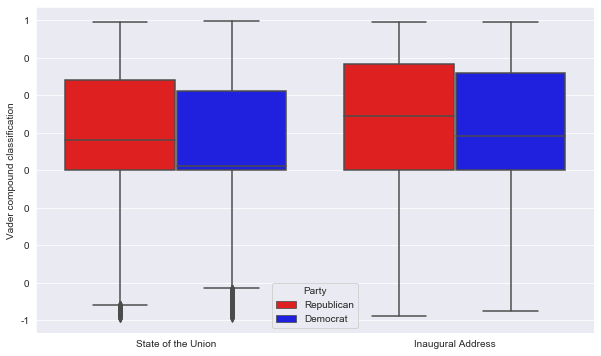

In [28]:
#Boxplot
sns.set_style("darkgrid")
ax = sns.boxplot(x='Type', y="vader_com", orient='v', hue='Party', data=df_vader, palette = ['red', 'blue'])
#plt.title("Box plot of Vader compound classification")
plt.xlabel("")
plt.ylabel("Vader compound classification")

ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])

[Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '1')]

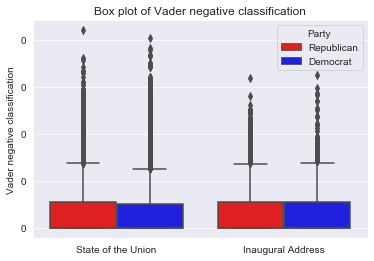

In [8]:
#Boxplot
sns.set_style("darkgrid")
ax = sns.boxplot(x='Type', y="vader_neg", orient='v', hue='Party', data=df_vader, palette = ['red', 'blue'])
plt.title("Box plot of Vader negative classification")
plt.xlabel("")
plt.ylabel("Vader negative classification")

ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])